In [95]:
import pandas as pd
import mygene

# from gprofiler import GProfiler
import gseapy as gp
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# -------------------------------
# 1. Load and filter the predictions
# -------------------------------
# Assuming your CSV file is named "predictions.csv"
df = pd.read_csv("../results/emb_extraction_model_pred.csv")

# Filter for genes with Label 0 but predicted as 1 (false positives)
false_positives = df[(df["Label"] == 0) & (df["Pred"] == 1)]
print("Genes with Label 0 but predicted as 1:")
print(false_positives)

Genes with Label 0 but predicted as 1:
            Gene  Label  Pred     Score
2           NOS1    0.0     1  0.851384
4          ABCC9    0.0     1  1.000000
30          FNTB    0.0     1  0.974066
75          CDK1    0.0     1  0.999710
76         CCNB1    0.0     1  0.994031
...          ...    ...   ...       ...
13564     ABCC11    0.0     1  0.999998
13583     ZNF582    0.0     1  0.999664
13595       FAAH    0.0     1  0.999997
13598   HLA-DRB1    0.0     1  1.000000
13612  KIAA1549L    0.0     1  1.000000

[954 rows x 4 columns]


In [46]:
# -------------------------------
# 2. Retrieve gene information using MyGene.info
# -------------------------------
mg = mygene.MyGeneInfo()
gene_info = {}

for gene in false_positives["Gene"]:
    # Query for gene details: symbol, name, summary, Gene Ontology terms, and UniProt links
    result = mg.query(
        gene, species="human", fields="symbol,name,summary,go,uniprot", size=1
    )
    if result["hits"]:
        gene_info[gene] = result["hits"][0]
    else:
        gene_info[gene] = "No information found"

# Print out the gene information
print("\nBiological information for each false positive gene:")
for gene, info in gene_info.items():
    print(f"\nGene: {gene}")
    if isinstance(info, dict):
        print("Symbol:", info.get("symbol", "N/A"))
        print("Name:", info.get("name", "N/A"))
        print("Summary:", info.get("summary", "N/A"))
        # Display GO annotations if available
        if "go" in info:
            print("GO Annotations:")
            for category, terms in info["go"].items():
                print(f"  {category.upper()}:")
                # 'terms' may be a list or a single dict
                if isinstance(terms, list):
                    for term in terms:
                        print("    -", term.get("term", "N/A"))
                elif isinstance(terms, dict):
                    print("    -", terms.get("term", "N/A"))
        # Display UniProt info if available
        if "uniprot" in info:
            print("UniProt:", info["uniprot"])
    else:
        print(info)

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequen

KeyboardInterrupt: 

In [47]:
df

,Gene,Label,Pred,Score
0,STIM1,0.0,0,0.011550
1,TRPC1,0.0,0,0.057710
2,NOS1,0.0,1,0.851384
3,ATP2B4,0.0,0,0.416965
4,ABCC9,0.0,1,1.000000
...,...,...,...,...
13622,GPR153,0.0,0,0.026982
13623,HDC,0.0,0,0.006820
13624,CSMD1,0.0,0,0.421210
13625,BHLHE22,0.0,0,0.029990


In [48]:
df.sort_values(by="Score", ascending=False, inplace=True)

In [49]:
df.to_csv("../results/emb_extraction_model_pred_sorted.csv", index=False)

In [79]:
df

,Gene,Label,Pred,Score
11919,MLNR,1.0,1,1.000000e+00
1620,CLCA1,1.0,1,1.000000e+00
7226,TRHR,1.0,1,1.000000e+00
3636,SLC22A8,0.0,1,1.000000e+00
1614,AGTR1,1.0,1,1.000000e+00
...,...,...,...,...
4693,KIAA0753,0.0,0,3.654661e-07
8210,CDK12,0.0,0,3.458797e-07
409,GSTA1,0.0,0,1.717210e-07
2152,STK16,0.0,0,1.236942e-07


In [81]:
all_pos = df[df["Pred"] == 1]
all_pos

,Gene,Label,Pred,Score
11919,MLNR,1.0,1,1.000000
1620,CLCA1,1.0,1,1.000000
7226,TRHR,1.0,1,1.000000
3636,SLC22A8,0.0,1,1.000000
1614,AGTR1,1.0,1,1.000000
...,...,...,...,...
320,PIK3CD,0.0,1,0.520733
2646,QPCTL,0.0,1,0.517436
13360,TMCC2,0.0,1,0.510807
4385,KRTAP5-11,0.0,1,0.503751


In [50]:
fp_df = df[(df["Label"] == 0) & (df["Pred"] == 1)]

In [51]:
top_x = fp_df[(fp_df["Score"] == 1)]

In [52]:
top_x

,Gene,Label,Pred,Score
3636,SLC22A8,0.0,1,1.0
6974,ADORA1,0.0,1,1.0
3642,CDH3,0.0,1,1.0
508,IL18,0.0,1,1.0
1604,IL3RA,0.0,1,1.0
...,...,...,...,...
11773,PDE10A,0.0,1,1.0
13598,HLA-DRB1,0.0,1,1.0
12505,NPC1L1,0.0,1,1.0
7604,PTGES,0.0,1,1.0


In [54]:
# build hit list
hits = top_x["Gene"].tolist()

# perform enrichment
enr = gp.enrichr(
    gene_list=hits,
    gene_sets=["KEGG_2021_Human", "Reactome_2022", "GO_Biological_Process_2023"],
    outdir=None,  # or a folder name to save results
    cutoff=0.05,  # only show terms with adjusted p < 0.05
)

# inspect top results
print(enr.results[["Term", "Adjusted P-value", "Overlap"]].head(10))

                                           Term  Adjusted P-value Overlap
0  Metabolism of xenobiotics by cytochrome P450      2.975771e-35   32/76
1                               Drug metabolism      9.361009e-30  32/108
2       Neuroactive ligand-receptor interaction      3.059300e-29  48/341
3        Cytokine-cytokine receptor interaction      8.370316e-27  43/295
4                       Chemical carcinogenesis      3.272735e-26  39/239
5                            Retinol metabolism      3.272735e-26   25/68
6                  Steroid hormone biosynthesis      1.912407e-24   23/61
7                                Bile secretion      7.846644e-23   25/90
8                    Hematopoietic cell lineage      8.217072e-18   22/99
9                            Pathways in cancer      8.217072e-18  44/531


In [55]:
enr.results[["Term", "Adjusted P-value", "Overlap"]].to_csv(
    "../results/emb_extraction_model_pred_enrichment.csv", index=False
)

In [56]:
fp_df

,Gene,Label,Pred,Score
3636,SLC22A8,0.0,1,1.000000
6974,ADORA1,0.0,1,1.000000
3642,CDH3,0.0,1,1.000000
508,IL18,0.0,1,1.000000
1604,IL3RA,0.0,1,1.000000
...,...,...,...,...
320,PIK3CD,0.0,1,0.520733
2646,QPCTL,0.0,1,0.517436
13360,TMCC2,0.0,1,0.510807
4385,KRTAP5-11,0.0,1,0.503751


In [57]:
ranked = fp_df[["Gene", "Score"]]
ranked

,Gene,Score
3636,SLC22A8,1.000000
6974,ADORA1,1.000000
3642,CDH3,1.000000
508,IL18,1.000000
1604,IL3RA,1.000000
...,...,...
320,PIK3CD,0.520733
2646,QPCTL,0.517436
13360,TMCC2,0.510807
4385,KRTAP5-11,0.503751


In [68]:
top = df[["Gene", "Score"]]
top = top[(top["Score"] == 1)]
top

,Gene,Score
11919,MLNR,1.0
1620,CLCA1,1.0
7226,TRHR,1.0
3636,SLC22A8,1.0
1614,AGTR1,1.0
...,...,...
12505,NPC1L1,1.0
13562,CA6,1.0
7604,PTGES,1.0
11749,GRP,1.0


In [88]:
ranked = fp_df[["Gene", "Score"]]

# 2) Run prerank GSEA
pre_res = gp.prerank(
    rnk=ranked,
    gene_sets=["KEGG_2021_Human", "GO_Biological_Process_2023"],
    outdir=None,
    permutation_num=1000,  # for p-value estimation
    min_size=15,
    max_size=500,
)

# 3) View leading-edge pathways
# print(pre_res.res2d[['ES','NED','fdr']].sort_values('fdr').head(10))

2025-04-27 22:20:24,719 [WARNING] Duplicated values found in preranked stats: 45.39% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [89]:
pre_res.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,KEGG_2021_Human__Neuroactive ligand-receptor i...,0.538346,4.500468,0.0,0.0,0.0,52/59,37.63%,P2RX1;GRIN3B;S1PR2;GRIN2C;GRIK2;ADORA1;TRPV1;P...
1,prerank,KEGG_2021_Human__Cytokine-cytokine receptor in...,0.450526,3.851015,0.0,0.0,0.0,55/61,48.43%,CCL2;IL17RA;LTBR;IL5RA;CSF2RA;IL1R2;CSF2;EPOR;...
2,prerank,KEGG_2021_Human__Metabolism of xenobiotics by ...,0.435336,3.272032,0.0,0.0,0.0,31/44,28.93%,ADH1A;CBR1;CYP3A5;GSTM1;CYP2B6;CYP2D6;ADH5;CYP...
3,prerank,KEGG_2021_Human__Hematopoietic cell lineage,0.49112,3.200624,0.0,0.0,0.0,31/33,46.86%,CD33;IL5RA;CSF2RA;IL1R2;CSF2;EPOR;IL1R1;HLA-DR...
4,prerank,KEGG_2021_Human__Retinol metabolism,0.472432,3.050284,0.0,0.0,0.0,25/32,32.49%,ADH1A;CYP3A5;CYP2B6;ADH5;CYP2C9;ADH1C;CYP2A7;U...
...,...,...,...,...,...,...,...,...,...,...
185,prerank,KEGG_2021_Human__Amphetamine addiction,-0.121088,-0.659786,0.874092,0.906881,1.0,16/20,68.13%,CACNA1C;CAMK2D;PRKCA;MAOB;MAOA;DDC;HDAC2;HDAC1...
186,prerank,KEGG_2021_Human__Regulation of actin cytoskeleton,-0.122492,-0.646589,0.906178,0.910602,1.0,11/19,43.82%,PIK3CD;PAK3;SLC9A1;PIP4K2B;MAP2K2;MYLK;ROCK1;P...
187,prerank,KEGG_2021_Human__Coronavirus disease,0.094335,0.610432,0.928344,0.952013,1.0,6/32,10.48%,CCL2;FGG;CFD;CSF2;HBEGF;FGB
188,prerank,GO_Biological_Process_2023__Cellular Response ...,0.119397,0.599581,0.946459,0.950098,1.0,7/18,28.62%,CYP11B2;AKR1C3;CYP11B1;RYR1;CACNA1H;MAPK3;ALOX15


In [90]:
# pre_res.res2d is your GSEA results DataFrame
sig = pre_res.res2d[pre_res.res2d["FDR q-val"] < 0.05]
ranked = sig.sort_values(["FDR q-val", "NES"], ascending=[True, False])
display(ranked.head(50)[["Term", "NES", "NOM p-val", "FDR q-val"]])
ranked.to_csv(
    "../results/emb_extraction_model_pred_gsea-FALSEPOSITIVES.csv", index=False
)

,Term,NES,NOM p-val,FDR q-val
0,KEGG_2021_Human__Neuroactive ligand-receptor i...,4.500468,0.0,0.0
1,KEGG_2021_Human__Cytokine-cytokine receptor in...,3.851015,0.0,0.0
2,KEGG_2021_Human__Metabolism of xenobiotics by ...,3.272032,0.0,0.0
3,KEGG_2021_Human__Hematopoietic cell lineage,3.200624,0.0,0.0
4,KEGG_2021_Human__Retinol metabolism,3.050284,0.0,0.0
5,GO_Biological_Process_2023__Chemical Synaptic ...,3.049782,0.0,0.0
6,KEGG_2021_Human__Rheumatoid arthritis,3.018677,0.0,0.0
10,KEGG_2021_Human__Amyotrophic lateral sclerosis,-2.855257,0.0,0.0
8,KEGG_2021_Human__Diabetic cardiomyopathy,-2.884281,0.0,0.0
13,KEGG_2021_Human__Steroid hormone biosynthesis,2.702093,0.0,0.000073


In [69]:
# ----------------------
# 2) Run prerank GSEA on top x false positives
pre_res_top_fp = gp.prerank(
    rnk=top,
    gene_sets=["KEGG_2021_Human", "GO_Biological_Process_2023"],
    outdir=None,
    permutation_num=1000,  # for p-value estimation
    min_size=15,
    max_size=500,
)

# 3) View leading-edge pathways
# print(pre_res.res2d[['ES','NED','fdr']].sort_values('fdr').head(10))

2025-04-27 22:14:05,786 [WARNING] Duplicated values found in preranked stats: 99.81% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [70]:
pre_res_top_fp.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,KEGG_2021_Human__PI3K-Akt signaling pathway,-0.218616,-1.938729,0.008214,0.325099,0.236,34/64,34.09%,ITGB7;LPAR6;IL4R;LAMA4;FLT3;PTK2;IL2RB;LAMA5;L...
1,prerank,KEGG_2021_Human__Regulation of actin cytoskeleton,0.277778,1.911515,0.017613,0.311163,0.258,18/36,24.11%,CHRM1;MRAS;F2;FGF4;ITGA2;FGFR1;F2R;CHRM4;ITGA5...
2,prerank,KEGG_2021_Human__Morphine addiction,-0.368276,-1.805626,0.020534,0.33869,0.419,14/17,46.89%,PDE7B;DRD1;GABBR2;GABBR1;GABRG2;OPRM1;GABRA2;A...
3,prerank,KEGG_2021_Human__Focal adhesion,-0.271443,-1.732171,0.020202,0.337421,0.553,13/28,20.90%,ITGB7;LAMA4;PTK2;LAMA5;LAMC1;PDGFRA;MET;ITGB3;...
4,prerank,KEGG_2021_Human__Drug metabolism,0.239394,1.692929,0.031873,0.501876,0.587,22/36,38.79%,FMO1;CYP2D6;CYP3A5;FMO3;ADH7;GSTM1;CYP2B6;ADH1...
...,...,...,...,...,...,...,...,...,...,...
74,prerank,KEGG_2021_Human__Nicotine addiction,0.114035,0.568261,0.967146,0.962486,1.0,3/18,5.65%,GRIN3B;GRIN2C;CHRNA7
75,prerank,KEGG_2021_Human__Aldosterone synthesis and sec...,-0.119782,-0.558695,0.948133,1.0,1.0,9/16,44.82%,NPR1;CACNA1G;CACNA1I;NPPA;CACNA1H;AGTR1;CYP11A...
76,prerank,KEGG_2021_Human__Fluid shear stress and athero...,-0.111111,-0.554872,0.970986,1.0,1.0,10/18,45.01%,MMP2;PTK2;ITGB3;ITGA2B;GSTM2;GSTO2;BMPR1B;MAP2...
77,prerank,KEGG_2021_Human__Hypertrophic cardiomyopathy,-0.112743,-0.538357,0.984405,0.998491,1.0,11/16,58.00%,ITGB7;ITGB3;ITGA2B;ITGB6;MYH7;ITGB1;LAMA1;ITGB...


In [ ]:
# pre_res.res2d is your GSEA results DataFrame
sig = pre_res_top_fp.res2d[pre_res_top_fp.res2d["FDR q-val"] < 0.5]
ranked = sig.sort_values(["FDR q-val", "NES"], ascending=[True, False])
print(ranked.head(20)[["Term", "NES", "NOM p-val", "FDR q-val"]])

                                                Term       NES NOM p-val  \
1  KEGG_2021_Human__Regulation of actin cytoskeleton  1.911515  0.017613   
0        KEGG_2021_Human__PI3K-Akt signaling pathway -1.938729  0.008214   
3                    KEGG_2021_Human__Focal adhesion -1.732171  0.020202   
2                KEGG_2021_Human__Morphine addiction -1.805626  0.020534   
5    KEGG_2021_Human__Human papillomavirus infection -1.625176  0.031646   
6            KEGG_2021_Human__Small cell lung cancer -1.555159  0.050607   

  FDR q-val  
1  0.311163  
0  0.325099  
3  0.337421  
2   0.33869  
5   0.42377  
6  0.476666  


In [91]:
# ----------------------
# 2) Run prerank GSEA on ALL POSITIVES
pre_res_top_ap = gp.prerank(
    rnk=all_pos,
    gene_sets=["KEGG_2021_Human", "GO_Biological_Process_2023"],
    outdir=None,
    permutation_num=1000,  # for p-value estimation
    min_size=15,
    max_size=500,
)

# 3) View leading-edge pathways
# print(pre_res.res2d[['ES','NED','fdr']].sort_values('fdr').head(10))

2025-04-27 22:20:35,053 [WARNING] Duplicated values found in preranked stats:
sample	ratio
Label   99.84%
Pred    99.92%
Score   54.68%
The order of those genes will be arbitrary, which may produce unexpected results.


In [92]:
pre_res_top_ap.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,Score,KEGG_2021_Human__Neuroactive ligand-receptor i...,0.533516,7.30598,0.0,0.0,0.0,155/173,43.70%,CCKBR;GRP;CHRND;DRD5;OPRL1;EDNRA;CALCA;GABRB2;...
1,Pred,KEGG_2021_Human__Neuroactive ligand-receptor i...,-0.524769,-7.247255,0.0,0.0,0.0,153/173,43.38%,MLNR;TRHR;AGTR1;ADORA1;S1PR3;GRIK3;BDKRB2;MC4R...
2,Pred,GO_Biological_Process_2023__Chemical Synaptic ...,-0.377847,-4.094127,0.0,0.0,0.0,79/93,50.08%,GRIK3;GABRA4;GABRB1;GABRA2;HTR5A;CHRNG;HTR4;GR...
3,Score,GO_Biological_Process_2023__Chemical Synaptic ...,0.377952,4.001171,0.0,0.0,0.0,74/93,44.67%,CHRND;KCNQ2;DRD5;GABRB2;GRIA2;GRIA4;CHRNB1;CHR...
4,Pred,GO_Biological_Process_2023__Adenylate Cyclase-...,-0.440347,-3.887693,0.0,0.0,0.0,49/59,41.20%,MC4R;ADRA1D;PTGFR;GIPR;LHCGR;MC3R;RAMP1;CALCRL...
...,...,...,...,...,...,...,...,...,...,...
703,Score,KEGG_2021_Human__Amphetamine addiction,0.093904,0.531845,0.978417,0.9862,1.0,24/24,90.79%,GRIA2;GRIA4;GRIA1;GRIN3B;GRIN2C;GRIA3;GRIN1;GR...
704,Pred,KEGG_2021_Human__Small cell lung cancer,-0.075938,-0.530831,0.975,0.979082,1.0,11/36,23.26%,ITGB1;LAMA1;LAMA5;LAMC1;PTK2;LAMA4;RXRB;RXRA;I...
705,Score,KEGG_2021_Human__Long-term depression,0.095849,0.507379,0.98895,0.986475,1.0,6/20,20.84%,GRIA2;GRIA1;RYR1;GRM1;GRIA3;GNAQ
706,Score,GO_Biological_Process_2023__Cellular Response ...,-0.084951,-0.490988,0.989011,0.992305,1.0,12/22,44.91%,ITPKC;CDKN1B;CAMK2D;SCN5A;RYR3;MAPK9;ADCY1;MT1...


In [93]:
# pre_res.res2d is your GSEA results DataFrame
sig = pre_res_top_ap.res2d[pre_res_top_ap.res2d["FDR q-val"] < 0.5]
ranked = sig.sort_values(["FDR q-val", "NES"], ascending=[True, False])
display(ranked.head(50)[["Term", "NES", "NOM p-val", "FDR q-val"]])
ranked.to_csv(
    "../results/emb_extraction_model_pred_gsea_ALL_POSITIVES.csv", index=False
)

,Term,NES,NOM p-val,FDR q-val
0,KEGG_2021_Human__Neuroactive ligand-receptor i...,7.30598,0.0,0.0
3,GO_Biological_Process_2023__Chemical Synaptic ...,4.001171,0.0,0.0
6,GO_Biological_Process_2023__Adenylate Cyclase-...,3.825317,0.0,0.0
9,GO_Biological_Process_2023__G Protein-Coupled ...,3.687874,0.0,0.0
10,GO_Biological_Process_2023__Anterograde Trans-...,3.647378,0.0,0.0
13,KEGG_2021_Human__Cytokine-cytokine receptor in...,3.497657,0.0,0.0
14,KEGG_2021_Human__Calcium signaling pathway,3.437787,0.0,0.0
15,GO_Biological_Process_2023__Adenylate Cyclase-...,3.246529,0.0,0.0
18,GO_Biological_Process_2023__Adenylate Cyclase-...,3.143474,0.0,0.0
24,KEGG_2021_Human__Hematopoietic cell lineage,2.974725,0.0,0.0


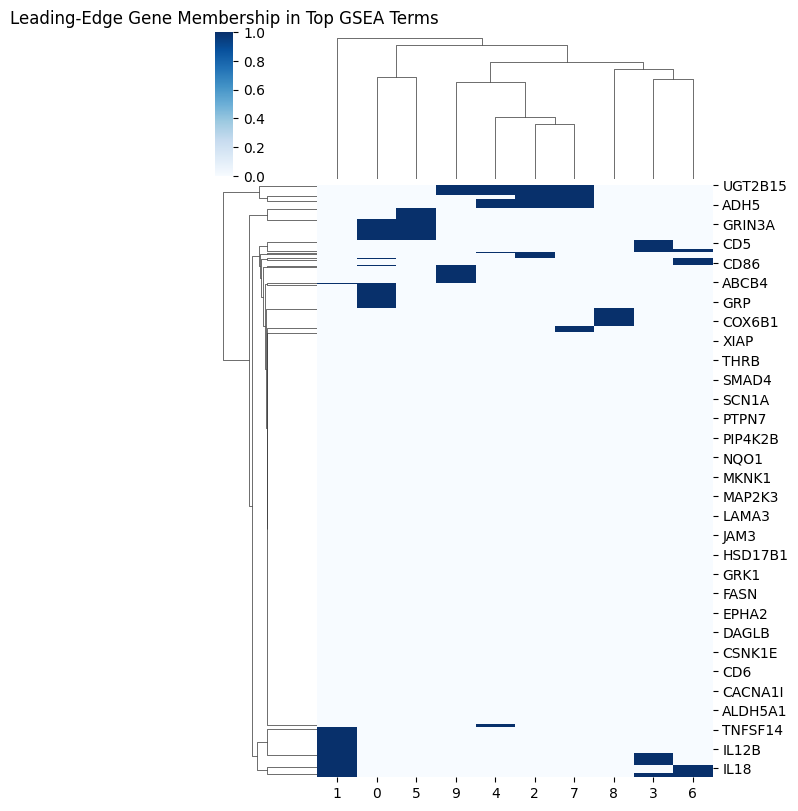

In [41]:
# pre_res.res2d has a “ledge_genes” column of comma-sep gene lists
leading = {
    term: set(gs.split(";"))
    for term, gs in zip(pre_res.res2d.index, pre_res.res2d["Lead_genes"])
}
all_genes = sorted(set.union(*leading.values()))
mat = pd.DataFrame(
    {
        term: [1 if g in leading[term] else 0 for g in all_genes]
        for term in pre_res.res2d.index[:10]
    },
    index=all_genes,
)

sns.clustermap(mat, figsize=(6, 8), cmap="Blues", cbar_pos=(0.02, 0.8, 0.03, 0.18))
plt.title("Leading‐Edge Gene Membership in Top GSEA Terms")
plt.show()

In [ ]:
import networkx as nx

G = nx.Graph()
for i, row in top.iterrows():
    G.add_node(row["Term"], score=row["-log10_FDR"])

# connect nodes with Jaccard similarity > θ (e.g. 0.25)
for i, row_i in top.iterrows():
    genes_i = set(
        row_i["Genes"].split(";")
    )  # if your DataFrame has the actual gene lists
    for j, row_j in top.iterrows():
        if i >= j:
            continue
        genes_j = set(row_j["Genes"].split(";"))
        jacc = len(genes_i & genes_j) / len(genes_i | genes_j)
        if jacc > 0.25:
            G.add_edge(row_i["Term"], row_j["Term"], weight=jacc)

pos = nx.spring_layout(G, seed=42)
sizes = [G.nodes[n]["score"] * 200 for n in G]
nx.draw(
    G,
    pos,
    node_size=sizes,
    node_color=sizes,
    cmap="Reds",
    with_labels=True,
    font_size=8,
)
plt.title("Enrichment Map of Top Pathways")
plt.show()

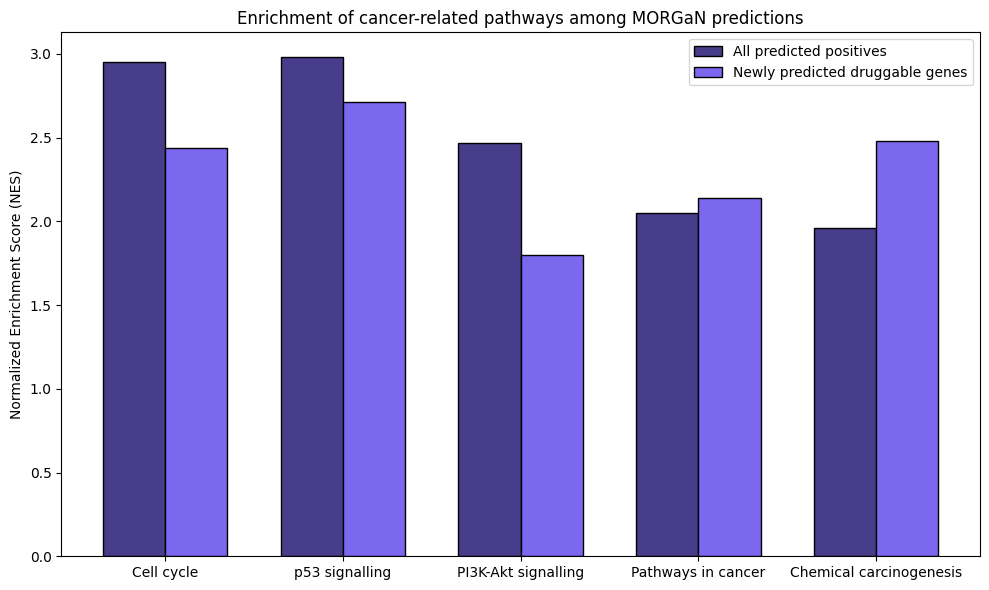

In [124]:
# Define the cancer pathways and corresponding NES for each group
pathways = [
    "Cell cycle",
    "p53 signalling",
    "PI3K-Akt signalling",
    "Pathways in cancer",
    "Chemical carcinogenesis",
]

nes_allpositives = [2.95, 2.98, 2.47, 2.05, 1.96]
nes_falsepositives = [2.44, 2.71, 1.80, 2.14, 2.48]

x = np.arange(len(pathways))  # label locations
width = 0.35  # bar width

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(
    x - width / 2,
    nes_allpositives,
    width,
    label="All predicted positives",
    color="darkslateblue",
    edgecolor="black",
)
rects2 = ax.bar(
    x + width / 2,
    nes_falsepositives,
    width,
    label="Newly predicted druggable genes",
    color="mediumslateblue",
    edgecolor="black",
)

# Add labels and title
ax.set_ylabel("Normalized Enrichment Score (NES)")
ax.set_title("Enrichment of cancer-related pathways among MORGaN predictions")
ax.set_xticks(x)
ax.set_xticklabels(pathways, rotation=0, ha="center")
ax.legend()

# Layout and display
plt.tight_layout()
plt.savefig("../figures/emb_extraction_model_pred_cancer_pathways.png", dpi=300)
plt.show()

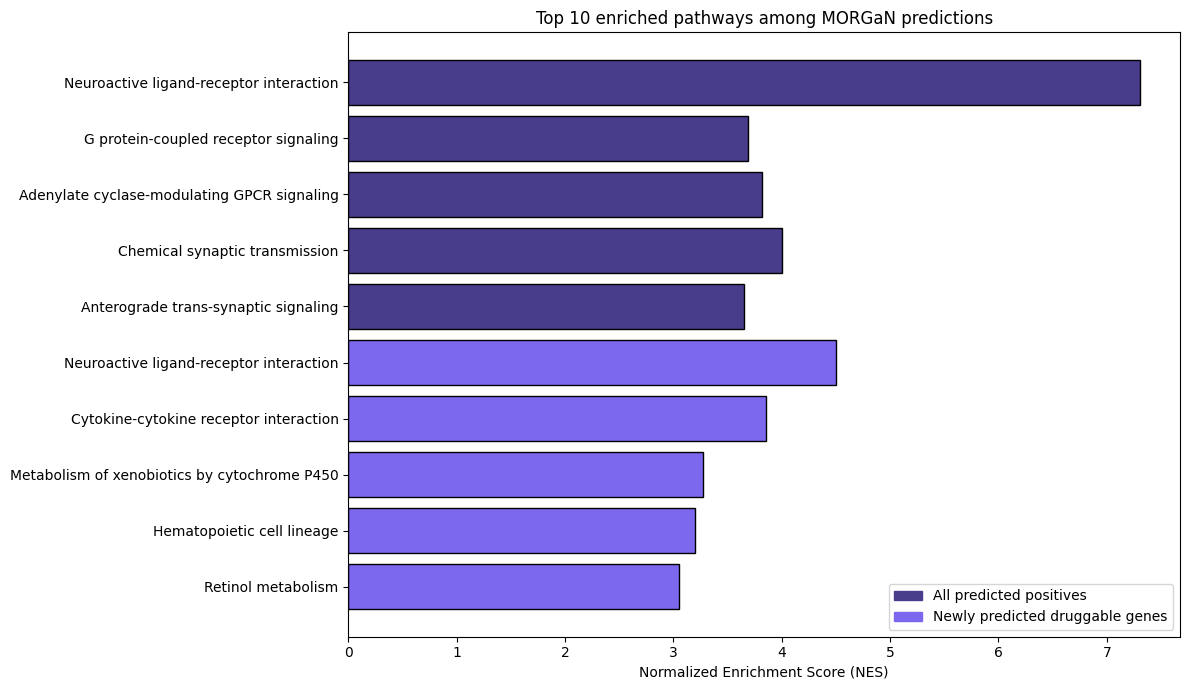

In [125]:
# Prepare data for plotting the Top 10 enriched pathways
top10_pathways = [
    "Neuroactive ligand-receptor interaction",
    "G protein-coupled receptor signaling",
    "Adenylate cyclase-modulating GPCR signaling",
    "Chemical synaptic transmission",
    "Anterograde trans-synaptic signaling",
    "Neuroactive ligand-receptor interaction",
    "Cytokine-cytokine receptor interaction",
    "Metabolism of xenobiotics by cytochrome P450",
    "Hematopoietic cell lineage",
    "Retinol metabolism",
]

groups = [
    "All predicted positives",
    "All predicted positives",
    "All predicted positives",
    "All predicted positives",
    "All predicted positives",
    "Newly Predicted Druggable Genes",
    "Newly Predicted Druggable Genes",
    "Newly Predicted Druggable Genes",
    "Newly Predicted Druggable Genes",
    "Newly Predicted Druggable Genes",
]

nes_scores = [7.31, 3.69, 3.82, 4.00, 3.65, 4.50, 3.85, 3.27, 3.20, 3.05]

# Plot
plt.figure(figsize=(12, 7))
colors = [
    "darkslateblue" if g == "All predicted positives" else "mediumslateblue"
    for g in groups
]

# Create horizontal bar plot
y_pos = range(len(top10_pathways))
plt.barh(y_pos, nes_scores, color=colors, edgecolor="black")
plt.yticks(y_pos, top10_pathways)
plt.xlabel("Normalized Enrichment Score (NES)")
plt.title("Top 10 enriched pathways among MORGaN predictions")
plt.gca().invert_yaxis()

# Add legend manually
import matplotlib.patches as mpatches

blue_patch = mpatches.Patch(color="darkslateblue", label="All predicted positives")
red_patch = mpatches.Patch(
    color="mediumslateblue", label="Newly predicted druggable genes"
)
plt.legend(handles=[blue_patch, red_patch])

plt.tight_layout()
plt.savefig("../figures/emb_extraction_model_pred_top10_pathways.png", dpi=300)
plt.show()

SLC22A8

ADORA1

CDH3

IL18